---
# Scikit-Learn: Desicion Boundary & The Confusion Matrix

Perform K-Nearest Neighbors on the Penguins dataset(binary classification).
The Introduction of *penguins* dataset is described in README.md

---

## Decision Boundary

A decision boundary is a line (in the case of two features), where all (or most) samples of one class are on one side of that line, and all samples of the other class are on the opposite side of the line. The line separates one class from the other. If you have more than two features, the decision boundary is not a line, but a (hyper)-plane in the dimension of your feature space.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Set Theme
sns.set_theme()

penguins = sns.load_dataset("penguins").dropna()

# Grab versicolor and virginica flowers
penguins = penguins[penguins["species"] != "Gentoo"]

# Create feature matrix
X = penguins[["bill_length_mm","flipper_length_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Adelie":
        return 0
    else:
        return 1
    
        
# Create target value array
y = penguins["species"].map(make_labels).to_numpy()

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 13)

# Instantiate a KNN classifier 
clf = KNeighborsClassifier(n_neighbors = 7)

In [10]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

---

Once the estimator is fitted, it can be used for predicting target values of new data.

---

In [4]:
print(f"clf.predict(X_test) = {clf.predict(X_test)} \n")
y_pred = clf.predict(X_test)

print(f"y_pred == y_test = {y_pred == y_test} \n")

print(f"sum(y_pred == y_test)/len(y_test) = {sum(y_pred == y_test)/len(y_test)}")

clf.predict(X_test) = [0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0] 

y_pred == y_test = [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True] 

sum(y_pred == y_test)/len(y_test) = 0.9859154929577465


In [5]:
# Calculate the accuracy
clf.score(X_test, y_test)

0.9859154929577465

---

visualize the decision boundary generated by our trained classifier


---

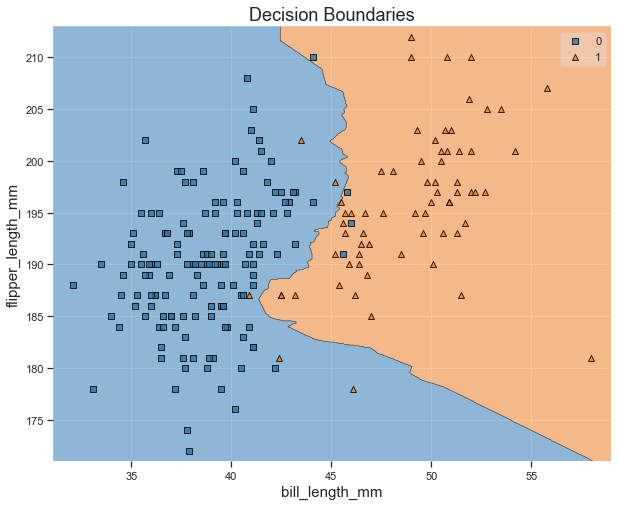

In [6]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("flipper_length_mm", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()

---

## The Confusion Matrix 

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class, or vice versa – both variants are found in the literature. The name stems from the fact that it makes it easy to see whether the system is confusing two classes (i.e. commonly mislabeling one as another).


---

cf_matrix = [[48  0]
 [ 1 22]] 



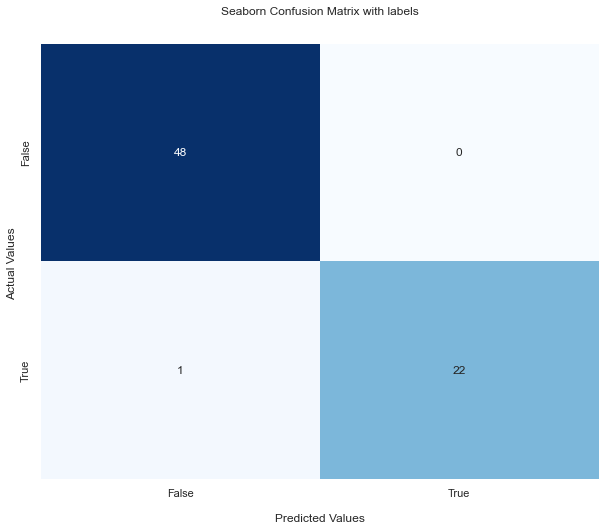

In [7]:
from sklearn.metrics import confusion_matrix

# Define the model
clf = KNeighborsClassifier(n_neighbors = 7)

# Fit the model
clf.fit(X_train,y_train)

# Make predictions on testing data
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

---

We can see that there are 23 actual true values, and 22 are predicted true. 48 actual false values, and all of them are predicted false.

0 false positive, 22 true positive 
1 false negative, 48 true negative

precision= 22/22,
recall=22/23

---

In [8]:
from sklearn.metrics import classification_report

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.96      0.98        23

    accuracy                           0.99        71
   macro avg       0.99      0.98      0.98        71
weighted avg       0.99      0.99      0.99        71



Great! The accuracy is 0.99, which is very high.

## Reference

Decision boundaries. Decision Boundaries – Machine Learning. (n.d.). Retrieved May 7, 2022, from https://huppenkothen.org/machine-learning-tutorial/05-DecisionBoundaries/index.html 

Wikimedia Foundation. (2021, December 3). Confusion matrix. Wikipedia. Retrieved May 7, 2022, from https://en.wikipedia.org/wiki/Confusion_matrix 